# 전처리 종합실습 평가 ③

#### 목표
1. 간략히 가설수립을 합니다.
2. 데이터를 탐색합니다.(역시 간략히)
3. 가설로 도출된 요인들을 추가변수로 생성합니다.
4. 모델링을 위한 전처리를 수행합니다.
5. 준비된 모델링 코드로 성능을 확인합니다.

## 1. 비즈니스 이해

문제 정의 : 
* 우리는 고객이 이탈할 것인지 사전에 예측하는 모델을 만들고자 합니다.
* 이탈할 고객을 미리 예측할 수 있다면, 프로모션을 통해 이탈을 예방할 수 있습니다.
* 그렇다면 고객의 이탈에 영향을 주는 요인은 무엇일까요?


다음과 같이 구체적으로 문제를 정의하고자 한다.
* 2016년12월말 기준으로
* 이후 3개월 방문(구매) 안한 사람을 이탈로 보자.
* 관심있는 고객은 
    - 2015~2016년 신규 가입 고객 이면서,
    - 2016년 하반기에 한번 이상 방문한 고객


### 문제1 :  
아래 셀에 이탈여부와 관련한 요인을 최소한 10가지 이상을 도출해 봅시다.  
이 질문에 대한 답은 2.데이터이해 단계와 3.데이터준비단계를 수행하면서 다시 여기로 돌아와서 수정하거나 추가해야 할 수도 있습니다.


예시1) 2016년에 4번이상 방문하고 10000만원 이상구매한 고객은 이탈하지 않을 것이다.  
예시2) 남성고객이면서, 30대 고객은 고객은 이탈할 것이다.   
    
    
    1)
    2)
    3)
    4)
    5)
    6)
    7)
    8)
    9)
    10)


## 2.데이터 이해

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
customers = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/customers.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,강원 원주시 늘품로,F,1960,강원도,원주시
1,c281448,2013-06-18,강원 원주시 치악로,F,1974,강원도,원주시
2,c038336,2003-10-10,강원 춘천시 서부대성로,F,1968,강원도,춘천시
3,c084237,2007-03-09,강원도 강릉시 연곡면 황어대길,F,1982,강원도,강릉시
4,c162600,2010-06-14,강원도 속초시 농공단지길,F,1978,강원도,속초시


In [37]:
products = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/products.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1052661,새우깡,간식,과자,3
1,p1054261,고구마스틱,간식,과자,3
2,p1097821,짱구,간식,과자,3
3,p1097831,감자칩,간식,과자,3
4,p1119071,뿌셔뿌셔,간식,과자,3


In [38]:
sales = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/sales.csv'
                 , sep=',', skipinitialspace=True, encoding='CP949')  
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


In [39]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate']) 
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate']) 

**데이터 탐색은 3.데이터 준비 단계 후에 진행해 봅시다.**

###  문제 2. 데이터 살펴보기

2-1) 연도별, 월별 매출액은?

In [40]:
sales['Year'] = sales.OrderDate.dt.year
sales['Month'] = sales.OrderDate.dt.month

In [7]:
sales.groupby(by=['Year', 'Month'], as_index = False)['Amt'].sum()

,Year,Month,Amt
0,2016,1,14209990
1,2016,2,14367451
2,2016,3,17111120
3,2016,4,15129917
4,2016,5,13976941
5,2016,6,13113610
6,2016,7,10717743
7,2016,8,10176702
8,2016,9,10496653
9,2016,10,10003648


2-2) 총 가입고객수는?

In [8]:
customers.CustomerID.count()

2243

2-3) 2015~2016에 가입한 고객은 총 몇명인가?

In [9]:
customers.loc[customers.RegisterDate.between('2015-01-01', '2016-12-31'),['CustomerID']].count()

CustomerID    485
dtype: int64

In [10]:
customers.loc[customers.RegisterDate.between('2015-01-01', '2016-12-31'),]['CustomerID'].count()

485

2-4) 2016년 하반기에 구매한 적이 있는 고객의 수는?

In [11]:
sales.loc[sales['OrderDate'].between('2016-07-01', '2016-12-31'),].CustomerID.unique().size

1711

2-5) 위에서 조회한 내용이 아닌 가설 중 세가지를 조회하시오.

In [ ]:
# #번가설 :      




In [ ]:
# #번가설 :      




In [ ]:
# #번가설 :      




## 3. 데이터 준비(Preprocessing)

### 문제 3. Labeling

우리는 고객이 이탈할 것인지 사전에 예측하는 모델을 만들고자 한다.  

* 2016년12월말 기준
* 이후 3개월 방문 안한 사람을 이탈로 보자.
* 관심있는 고객은 
    - 2015~2016년 신규 가입 고객 이면서,
    - 2016년 하반기에 한번 이상 방문한 고객

3-1) 고객ID 조회 : 
    - 2016년 하반기에 한번 이상 방문한 고객 중 2015~2016년 신규 가입 고객을 조회하시오.

In [6]:
sales.loc[sales['OrderDate'] >= '2017-01-01',]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
55976,5,2,2017-01-02,p1133371,7,7000,c271068
55977,5,6,2017-01-02,p1012751,1,1850,c271068
55978,5,10,2017-01-02,p1144661,1,1950,c271068
55979,5,11,2017-01-02,p1207281,1,3300,c271068
55980,5,12,2017-01-02,p1299491,1,1950,c271068
...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999
70008,53,6,2017-03-31,p1178011,1,8800,c337999
70009,55,6,2017-03-31,p1054261,1,2091,c088320
70010,59,4,2017-03-31,p1175481,1,1300,c238056


In [7]:
sales.loc[sales['OrderDate'].between('2016-07-01', '2016-12-31'),]

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
29519,89,1,2016-07-01,p1030071,1,2450,c127482
29520,89,2,2016-07-01,p1144371,1,1250,c127482
29521,89,4,2016-07-01,p1159481,1,1650,c127482
29522,101,1,2016-07-01,p1011291,1,273,c217179
29523,103,1,2016-07-01,p1175481,1,1300,c222561
...,...,...,...,...,...,...,...
55971,97,5,2016-12-31,p1005891,2,3900,c259362
55972,99,1,2016-12-31,p1012751,1,1850,c350918
55973,99,2,2016-12-31,p1159481,1,2200,c350918
55974,99,3,2016-12-31,p1207281,1,3300,c350918


In [14]:
sales.loc[sales['OrderDate'].between('2017-01-01', '2017-02-28'), 'CustomerID'].unique()

array(['c271068', 'c146132', 'c226242', ..., 'c137369', 'c256672',
       'c108482'], dtype=object)

In [41]:
customer1 = sales.loc[sales['OrderDate'].between('2016-07-01', '2016-12-31'), ['CustomerID']].drop_duplicates()

In [42]:
customer2 = customers.loc[customers['RegisterDate'].between('2015-01-01', '2016-12-31'), ['CustomerID']]

In [43]:
customer3 = customer1.merge(customer2)

3-2) 3-1)의 결과에 해당하는 고객ID 별로 2017년 3월 방문 여부(이탈여부) 데이터프레임 만들기
    - 고객ID
    - 이탈여부


In [44]:
customer4 = sales.loc[sales['OrderDate'].between('2017-01-01', '2017-03-31'), ['CustomerID']].drop_duplicates()
customer4['Churn'] = 0

In [45]:
customer3.merge(customer4, how = 'left')

,CustomerID,Churn
0,c373441,0.0
1,c337831,NaN
2,c337999,0.0
3,c341674,0.0
4,c349783,0.0
...,...,...
349,c396022,0.0
350,c396059,0.0
351,c392672,NaN
352,c345428,NaN


In [46]:
customer_churn = customer3.merge(customer4, how = 'left').fillna(1)

In [47]:
customer_churn.Churn.value_counts()

0.0    226
1.0    128
Name: Churn, dtype: int64

### 문제 4. 변수 추가하기

문제 1에서 도출된 요인들을 변수로 만들기  
3-2) 문제 결과에 변수들을 추가하기.

아래 문제들을 풀고, 여러분의 변수들을 추가해 봅시다.  
현재를 2016년12월31일로 간주합니다.

4-1) 성별, 나이 추가하기   
현재를 2016년12월로 간주하여 나이를 계산한다.

In [25]:
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,강원 원주시 늘품로,F,1960,강원도,원주시
1,c281448,2013-06-18,강원 원주시 치악로,F,1974,강원도,원주시
2,c038336,2003-10-10,강원 춘천시 서부대성로,F,1968,강원도,춘천시
3,c084237,2007-03-09,강원도 강릉시 연곡면 황어대길,F,1982,강원도,강릉시
4,c162600,2010-06-14,강원도 속초시 농공단지길,F,1978,강원도,속초시


In [48]:
customer_churn = customer_churn.merge(customers.loc[:, ['CustomerID','RegisterDate', 'Gender', 'BirthYear']])

In [49]:
customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,BirthYear
0,c373441,0.0,2016-03-17,F,1977
1,c337831,1.0,2015-01-09,F,1984
2,c337999,0.0,2015-01-12,F,1977
3,c341674,0.0,2015-02-28,M,1973
4,c349783,0.0,2015-05-26,F,1973


In [50]:
customer_churn['Age'] = 2017 - customer_churn.BirthYear

In [51]:
customer_churn.drop(['BirthYear'], axis='columns', inplace=True)

In [52]:
customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,Age
0,c373441,0.0,2016-03-17,F,40
1,c337831,1.0,2015-01-09,F,33
2,c337999,0.0,2015-01-12,F,40
3,c341674,0.0,2015-02-28,M,44
4,c349783,0.0,2015-05-26,F,44


4-2) 최근 3개월 구매액, 방문횟수

In [53]:
sales_1 = sales.loc[sales['OrderDate'].between('2016-10-01', '2016-12-31'), ]

In [54]:
cust_sum = sales_1.groupby(by='CustomerID', as_index = False)["Amt"].sum()

In [55]:
cust_sum.head()

,CustomerID,Amt
0,c017487,44206
1,c017503,24400
2,c017517,57971
3,c017522,22027
4,c017526,9750


In [56]:
customer_churn = customer_churn.merge(cust_sum, how = 'left')

In [57]:
sales_1.groupby(by='CustomerID', as_index = False)["Amt"].agg(['sum','count'])

,sum,count
CustomerID,,
c017487,44206,18
c017503,24400,5
c017517,57971,21
c017522,22027,11
c017526,9750,4
...,...,...
c395401,9114,3
c395638,24802,7
c395673,4200,1


In [58]:
sales_2 = sales_1.loc[:, ['CustomerID','OrderDate']].drop_duplicates()

In [59]:
sales_2.groupby(by='CustomerID', as_index = False).count()

,CustomerID,OrderDate
0,c017487,9
1,c017503,2
2,c017517,12
3,c017522,7
4,c017526,1
...,...,...
1377,c395401,2
1378,c395638,2
1379,c395673,1
1380,c396022,1


In [60]:
sales_3 = sales_2.groupby(by='CustomerID', as_index = False).count().rename(columns={'OrderDate':'Count'})

In [61]:
sales_3

,CustomerID,Count
0,c017487,9
1,c017503,2
2,c017517,12
3,c017522,7
4,c017526,1
...,...,...
1377,c395401,2
1378,c395638,2
1379,c395673,1
1380,c396022,1


In [62]:
customer_churn = customer_churn.merge(sales_3, how = "left")

In [63]:
customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,Age,Amt,Count
0,c373441,0.0,2016-03-17,F,40,17491.0,3
1,c337999,0.0,2015-01-12,F,40,93637.0,22
2,c341674,0.0,2015-02-28,M,44,86163.0,19
3,c349783,0.0,2015-05-26,F,44,7800.0,2
4,c371075,0.0,2016-02-19,F,49,23775.0,5


4-3) 최근 3개월 카테고리별 구매액

In [64]:
sales_prod_1 = sales_1.merge(products.loc[:,['ProductID', 'Category']])

In [65]:
sales_prod_2 = sales_prod_1.groupby(by = ['CustomerID', 'Category'], as_index = False)['Amt'].sum()

In [66]:
sales_prod_2

,CustomerID,Category,Amt
0,c017487,간식,9546
1,c017487,반찬류,8950
2,c017487,유제품,11960
3,c017487,채소,13750
4,c017503,과일,17600
...,...,...,...
3468,c396022,간식,1455
3469,c396022,유제품,4150
3470,c396022,채소,2350
3471,c396059,과일,8370


In [68]:
sales_prod_3 = sales_prod_2.pivot("CustomerID", "Category", "Amt")
sales_prod_3.head()

Category,간식,과일,반찬류,유제품,채소
CustomerID,,,,,
c017487,9546.0,NaN,8950.0,11960.0,13750.0
c017503,NaN,17600.0,NaN,2750.0,4050.0
c017517,12317.0,8000.0,6500.0,15704.0,15450.0
c017522,NaN,NaN,13477.0,NaN,8550.0
c017526,NaN,NaN,5800.0,NaN,3950.0


In [69]:
sales_prod_3.reset_index(level=0, inplace=True)
sales_prod_3.head()

Category,CustomerID,간식,과일,반찬류,유제품,채소
0,c017487,9546.0,NaN,8950.0,11960.0,13750.0
1,c017503,NaN,17600.0,NaN,2750.0,4050.0
2,c017517,12317.0,8000.0,6500.0,15704.0,15450.0
3,c017522,NaN,NaN,13477.0,NaN,8550.0
4,c017526,NaN,NaN,5800.0,NaN,3950.0


In [70]:
customer_churn = customer_churn.merge(sales_prod_3, how='left')

In [71]:
customer_churn.fillna(0, inplace = True)

In [72]:
customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,Age,Amt,Count,간식,과일,반찬류,유제품,채소
0,c373441,0.0,2016-03-17,F,40,17491.0,3,1091.0,13100.0,800.0,0.0,2500.0
1,c337999,0.0,2015-01-12,F,40,93637.0,22,6091.0,0.0,11400.0,53446.0,22700.0
2,c341674,0.0,2015-02-28,M,44,86163.0,19,6136.0,16720.0,11850.0,19927.0,31530.0
3,c349783,0.0,2015-05-26,F,44,7800.0,2,0.0,0.0,7800.0,0.0,0.0
4,c371075,0.0,2016-02-19,F,49,23775.0,5,1455.0,7920.0,7400.0,5500.0,1500.0


4-4) 가입 개월수

In [74]:
pd.to_datetime('2017-12-31') -  customer_churn.RegisterDate

0      654 days
1     1084 days
2     1037 days
3      950 days
4      681 days
         ...   
264    373 days
265    372 days
266    421 days
267    998 days
268    403 days
Name: RegisterDate, Length: 269, dtype: timedelta64[ns]

In [75]:
(pd.to_datetime('2016-12-31') - customer_churn.RegisterDate)/np.timedelta64(1,'M')

0       9.495062
1      23.622662
2      22.078482
3      19.220107
4      10.382143
         ...    
264     0.262839
265     0.229984
266     1.839874
267    20.797142
268     1.248486
Name: RegisterDate, Length: 269, dtype: float64

In [76]:
((pd.to_datetime('2016-12-31') -  customer_churn.RegisterDate)/np.timedelta64(1,'M')).astype(int)

0       9
1      23
2      22
3      19
4      10
       ..
264     0
265     0
266     1
267    20
268     1
Name: RegisterDate, Length: 269, dtype: int32

In [77]:
customer_churn['Regi_Month'] = ((pd.to_datetime('2016-12-31') -  customer_churn.RegisterDate)/np.timedelta64(1,'M')).astype(int)

In [78]:
customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,Age,Amt,Count,간식,과일,반찬류,유제품,채소,Regi_Month
0,c373441,0.0,2016-03-17,F,40,17491.0,3,1091.0,13100.0,800.0,0.0,2500.0,9
1,c337999,0.0,2015-01-12,F,40,93637.0,22,6091.0,0.0,11400.0,53446.0,22700.0,23
2,c341674,0.0,2015-02-28,M,44,86163.0,19,6136.0,16720.0,11850.0,19927.0,31530.0,22
3,c349783,0.0,2015-05-26,F,44,7800.0,2,0.0,0.0,7800.0,0.0,0.0,19
4,c371075,0.0,2016-02-19,F,49,23775.0,5,1455.0,7920.0,7400.0,5500.0,1500.0,10


5) 그외 여러분이 도출한 요인을 추가 변수로 최소 5개 이상 만드시오.

## (추가) 2. 데이터 이해

다시 데이터 이해로 돌아갑니다.  
데이터 준비에서 정리한 데이터셋을 가지고, 가설이 참인지 거짓인지 살펴봅니다.  
이때, 기초통계량과 차트를 이용하게 됩니다. 그리고 이 단계를 특별히 **'탐색적 데이터 분석(EDA)'** 이라고 부릅니다.  
여기서는 몇가지 방법을 가지고 살펴보겠습니다.


In [79]:
import seaborn as sns

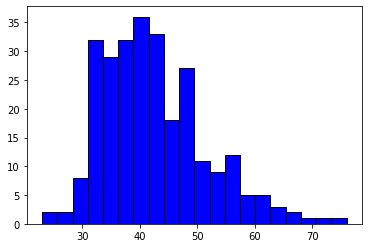

In [80]:
plt.hist(customer_churn['Age'], color = 'blue', edgecolor = 'black',bins = 20)
plt.show()

C:\Users\hanky\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


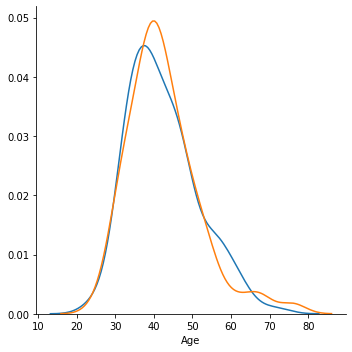

In [81]:
sns.FacetGrid(customer_churn, hue='Churn', size = 5)\
    .map(sns.distplot, 'Age', kde=True, hist=False)
plt.show()

C:\Users\hanky\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


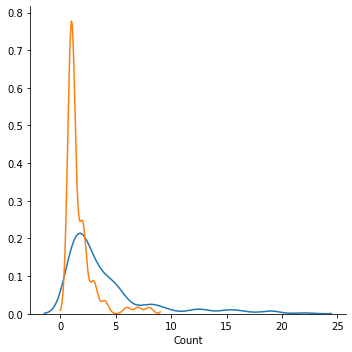

In [59]:
sns.FacetGrid(customer_churn, hue='Churn', size = 5)\
    .map(sns.distplot, 'Count', kde=True, hist=False)
plt.show()

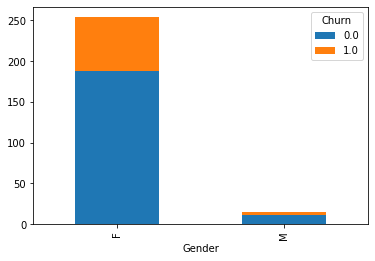

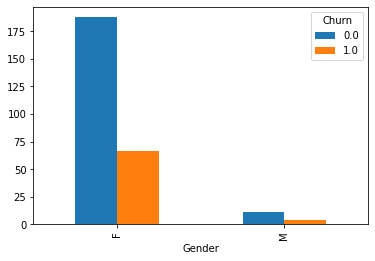

In [60]:
gb_churn = customer_churn.groupby("Gender")['Churn'].value_counts().unstack()
gb_churn.plot(kind='bar', stacked='True')
gb_churn.plot(kind='bar')
plt.show()

## 4.모델링

모델링을 위한 전처리
    * Dummry Variable
    * Scaling
   

### 문제 5. Dummy variable만들기


범주형 변수들을 가변수화 합니다.

In [82]:
# 범주형(명목형) 변수를 가변수로 만들고 붙여봅시다.
dummy_fields = ['Gender']
for each in dummy_fields:
    dummies = pd.get_dummies(customer_churn[each], prefix=each, drop_first=False)
    customer_churn = pd.concat([customer_churn, dummies], axis=1)

customer_churn.head()

,CustomerID,Churn,RegisterDate,Gender,Age,Amt,Count,간식,과일,반찬류,유제품,채소,Regi_Month,Gender_F,Gender_M
0,c373441,0.0,2016-03-17,F,40,17491.0,3,1091.0,13100.0,800.0,0.0,2500.0,9,1,0
1,c337999,0.0,2015-01-12,F,40,93637.0,22,6091.0,0.0,11400.0,53446.0,22700.0,23,1,0
2,c341674,0.0,2015-02-28,M,44,86163.0,19,6136.0,16720.0,11850.0,19927.0,31530.0,22,0,1
3,c349783,0.0,2015-05-26,F,44,7800.0,2,0.0,0.0,7800.0,0.0,0.0,19,1,0
4,c371075,0.0,2016-02-19,F,49,23775.0,5,1455.0,7920.0,7400.0,5500.0,1500.0,10,1,0


In [84]:
# 불필요한 변수들 제거 : 가변수화 하기 전 변수, id, 일련번호 등.
fields_to_drop = ['CustomerID','RegisterDate', 'Gender_F','Gender']
customer_churn = customer_churn.drop(fields_to_drop, axis=1)
customer_churn.head()

KeyError: "['CustomerID' 'RegisterDate' 'Gender_F' 'Gender'] not found in axis"

### Data Split

In [85]:
# sklearn에서 제공하는 split 함수를 이용해보자. : train_test_split
from sklearn.model_selection import train_test_split

# features와 target 분리
X = customer_churn.drop('Churn', axis=1)
y = customer_churn.loc[:, 'Churn'] 

train_features, test_features, train_target, test_target \
    = train_test_split(X, y, test_size=0.2, random_state=1)

### 문제 6. Scalinng

숫자형 변수들을 스케일링 합니다.

In [86]:
# 필요한 함수 로딩
from sklearn.preprocessing import MinMaxScaler

# 선언하기
minmax = MinMaxScaler()

# train 데이터로 .fit ==> 모든변수의 min, max, 공식 도출.
# 말하자면, scaling 하는 모델을 만드는 것!
minmax.fit(train_features) # train min, max

# 위 scaling 공식으로 적용하기(변환하기)
train_features_sc = minmax.transform(train_features)
test_features_sc = minmax.transform(test_features)

In [87]:
train_target, test_target = train_target.values, test_target.values

### 모델링
다음 코드는 그대로 실행하여 결과를 확인해 봅시다.

In [88]:
# 필요한 라이브러리 가져오자
from sklearn.neighbors import KNeighborsClassifier

# confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 모델 준비
knn_cl = KNeighborsClassifier(n_neighbors=4)
knn_cl.fit(train_features_sc, train_target)
test_pred = knn_cl.predict(test_features_sc)

test_acc = accuracy_score(test_target, test_pred)
print('test 정확도 : {:.2f}%'.format(test_acc*100))


test 정확도 : 62.96%


정 분류율(Accuracy)은 몇 % 인가요?  
높이기 위해서 더 해볼 수 있는 것은?

In [89]:
print(confusion_matrix(test_target, test_pred))

[[32  4]
 [16  2]]
